In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, FunctionTransformer, LabelEncoder,MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,GradientBoostingRegressor,RandomForestRegressor
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.pipeline import make_pipeline
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
sns.set()

In [2]:
df = pd.read_csv('../data/shot-data-all.csv')
df_top = pd.read_csv('../data/top-def.csv')
df_mid = pd.read_csv('../data/mid-def.csv')
df_bot = pd.read_csv('../data/bot-def.csv')

In [3]:
def return_model():
    return make_pipeline(
    StandardScaler(), 
    PCA(8), 
    GradientBoostingRegressor()
    )
def train_test(df,test_size):
    X = df[['game_time','shot_made','quarter','home','shot_distance','shot_value','cum_attempts','cum_fg_percent']]
    y = df['cum_shot_made']
    X_train, X_valid, y_train, y_valid = train_test_split(X, y)
    return X_train, X_valid, y_train, y_valid

(array([ 74., 244., 204., 196., 148.,  77.,  60.,  32.,  10.,   3.]),
 array([-0.68287541,  0.94480676,  2.57248893,  4.2001711 ,  5.82785327,
         7.45553544,  9.08321762, 10.71089979, 12.33858196, 13.96626413,
        15.5939463 ]),
 <a list of 10 Patch objects>)

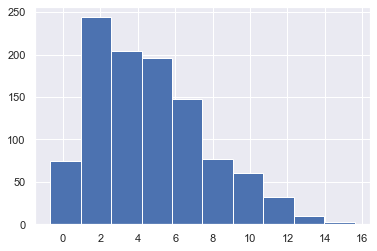

In [4]:
#TOP DEFENSE
top_def_model = return_model()
X_train, X_valid, y_train, y_valid = train_test(df_top, 0.25)
top_def_model.fit(X_train,y_train)
y_predict1 = top_def_model.predict(X_valid)
plt.hist(y_predict1)

(array([107., 205., 238., 193., 139., 126.,  65.,  38.,  13.,   5.]),
 array([-0.61293385,  1.04953203,  2.71199791,  4.37446379,  6.03692968,
         7.69939556,  9.36186144, 11.02432732, 12.6867932 , 14.34925909,
        16.01172497]),
 <a list of 10 Patch objects>)

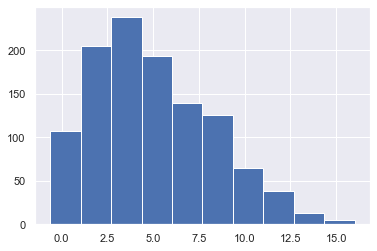

In [5]:
#MID DEFENSE
mid_def_model = return_model()
X_train, X_valid, y_train, y_valid = train_test(df_mid, 0.25)
mid_def_model.fit(X_train,y_train) 
y_predict2 = mid_def_model.predict(X_valid)
plt.hist(y_predict2)

(array([ 71., 217., 211., 180., 147.,  97.,  57.,  23.,   1.,   3.]),
 array([-1.19336388,  0.60556126,  2.40448641,  4.20341155,  6.00233669,
         7.80126184,  9.60018698, 11.39911212, 13.19803727, 14.99696241,
        16.79588756]),
 <a list of 10 Patch objects>)

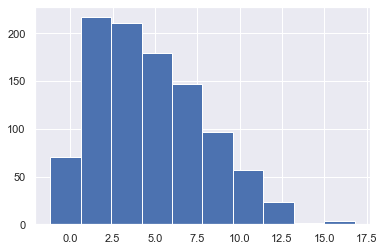

In [6]:
#BOTTOM DEFENSE 
bot_def_model = return_model()
X_train, X_valid, y_train, y_valid = train_test(df_bot, 0.25)
bot_def_model.fit(X_train,y_train)
y_predict3 = bot_def_model.predict(X_valid)
plt.hist(y_predict3)

In [7]:
#ANOVA TEST
#Step 0: level of signifance is 0.05
#Step 1: H_0: There is no statistical difference between top, middle, bottom defensive teams.
#        H_A: There is a statistical difference between top, middle, bottom defensive teams.
#Step 2: 
anova = stats.f_oneway(y_predict1,y_predict2,y_predict3)
print(anova.pvalue)
#Step 3:
#We concluded that our p-value > 0.05, which means we failed to reject the Null Hypothesis and it may seem there 
#is no statistical difference.

0.028075237820511006


In [8]:
print(stats.levene(y_predict1,y_predict2,y_predict3).pvalue)

0.010981504773618273


In [10]:
warriors_palette = ['#006BB6', '#FDB927', '#26282A']
sns.set_palette(sns.color_palette(warriors_palette))

(array([ 71., 217., 211., 180., 147.,  97.,  57.,  23.,   1.,   3.]),
 array([-1.19336388,  0.60556126,  2.40448641,  4.20341155,  6.00233669,
         7.80126184,  9.60018698, 11.39911212, 13.19803727, 14.99696241,
        16.79588756]),
 <a list of 10 Patch objects>)

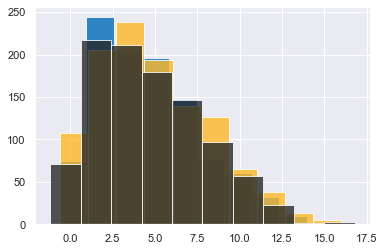

In [14]:
plt.hist(y_predict1,alpha =0.8)
plt.hist(y_predict2,alpha=0.8)
plt.hist(y_predict3,alpha=0.8)